<a href="https://colab.research.google.com/github/NataliiaPyrih/CodSoft/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

##Working with missing values

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

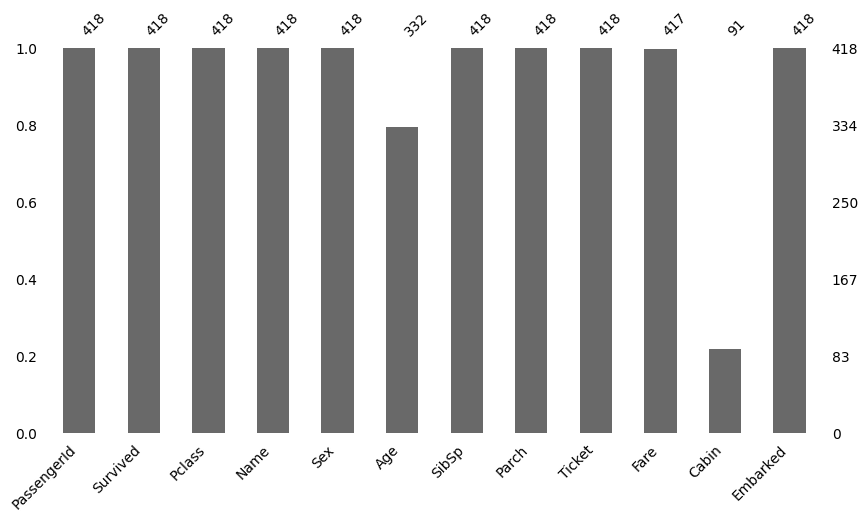

In [ ]:
msno.bar(df, figsize=(10,5), fontsize=10)
plt.show()

In [ ]:
drop_subset= df.columns[(df.isna().sum()<=len(df)*0.05)& (df.isna().sum()!=0)]
drop_subset

Index(['Fare'], dtype='object')

In [ ]:
df.dropna(subset=drop_subset, inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [ ]:
df.drop(["Cabin"], axis=1, inplace=True)
df.isna().sum().sum()

0

##Working with duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(['Ticket']).sum()

55

##Data Visualisation

([<matplotlib.patches.Wedge at 0x7a3ddb3d66e0>,
 [Text(-0.4542136194423196, 1.0018432950881628, '0'),
  Text(0.4542136194423197, -1.0018432950881628, '1')],
 [Text(-0.2477528833321743, 0.5464599791389979, '64%'),
  Text(0.24775288333217432, -0.5464599791389979, '36%')])

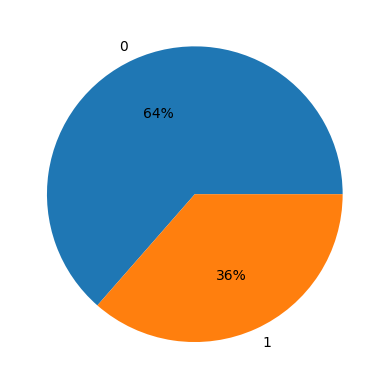

In [ ]:
plt.pie(df['Survived'].value_counts(),labels=df['Survived'].unique(),autopct='%.0f%%')

<Axes: >

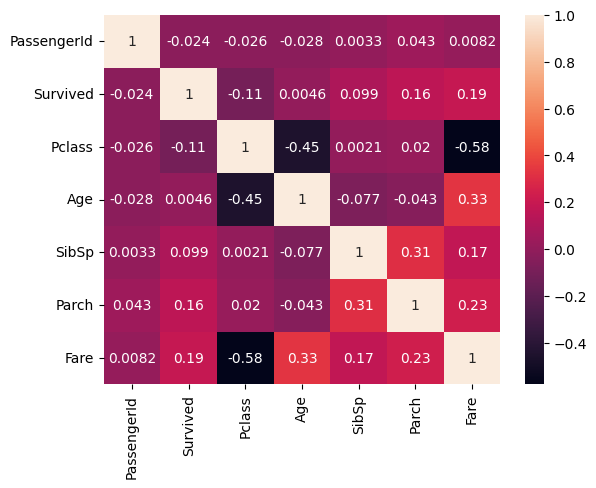

In [ ]:
sns.heatmap(df.corr(), annot=True)


*   Проверим гипотезу зависит ли выживаемость от класса пассажира
*   Проверим гипотезу зависит ли от вложенных денег выживание
*   Проверим гипотезу зависит ли выжывание от
*   Проверим выживание от пола и возраста
*  Проверим порт и возраст
*   Проверим с Parch и SibSp

Нужно получить картину: большинство выжывших это мужчина или женщина какого возраста, класса, в каком порту сели и сколько родственников


<Axes: xlabel='Age', ylabel='Count'>

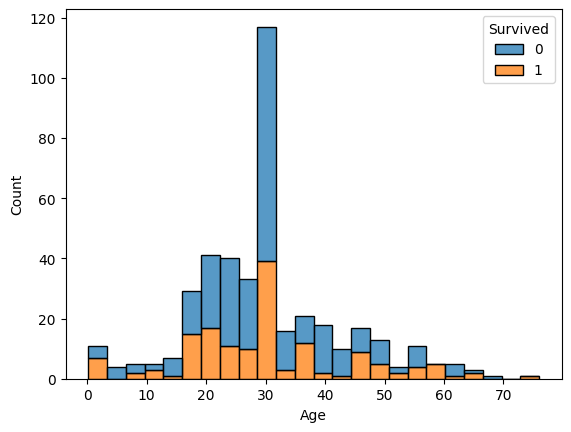

In [ ]:
sns.histplot(x='Age', hue='Survived',data=df, multiple='stack')

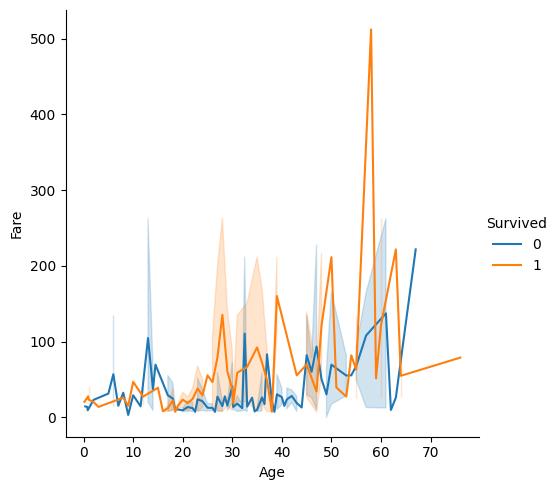

In [ ]:
sns.relplot(data=df, x='Age', y='Fare', hue='Survived', kind='line')

<Axes: xlabel='Pclass', ylabel='Age'>

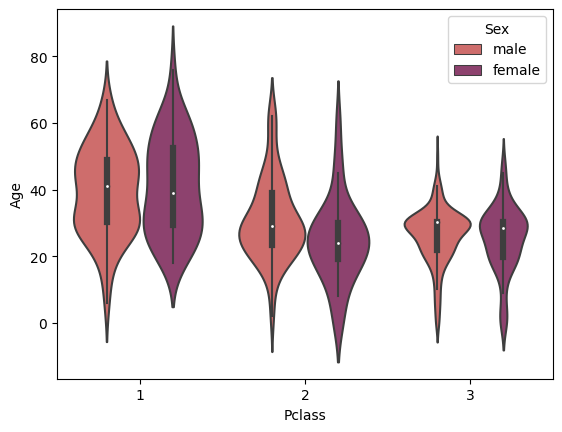

In [ ]:
sns.violinplot(y='Age', x='Pclass', hue='Sex',data=df,palette='flare')

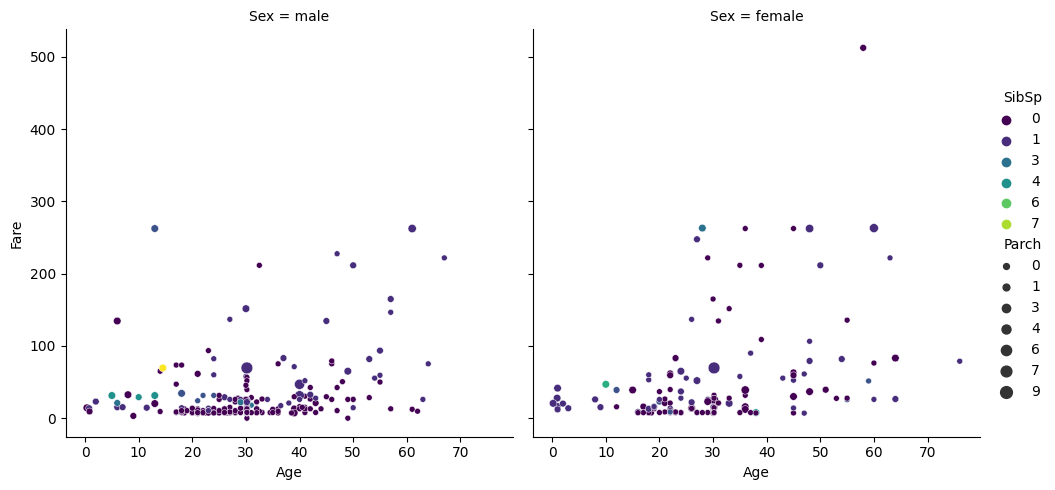

In [ ]:
sns.relplot(data=df, x='Age', y='Fare', col='Sex', hue='SibSp', size='Parch', kind='scatter', palette='viridis')

<Axes: xlabel='Pclass', ylabel='Survived'>

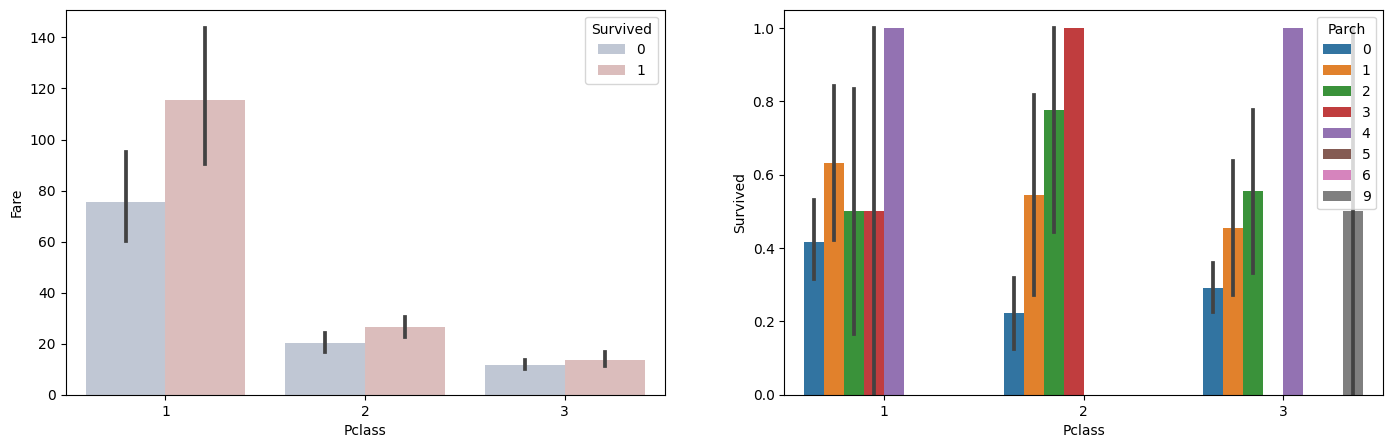

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(17,5))
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=df, ax=axs[0], palette='vlag')
sns.barplot(x='Pclass', y='Survived',hue='Parch', data=df, ax=axs[1])

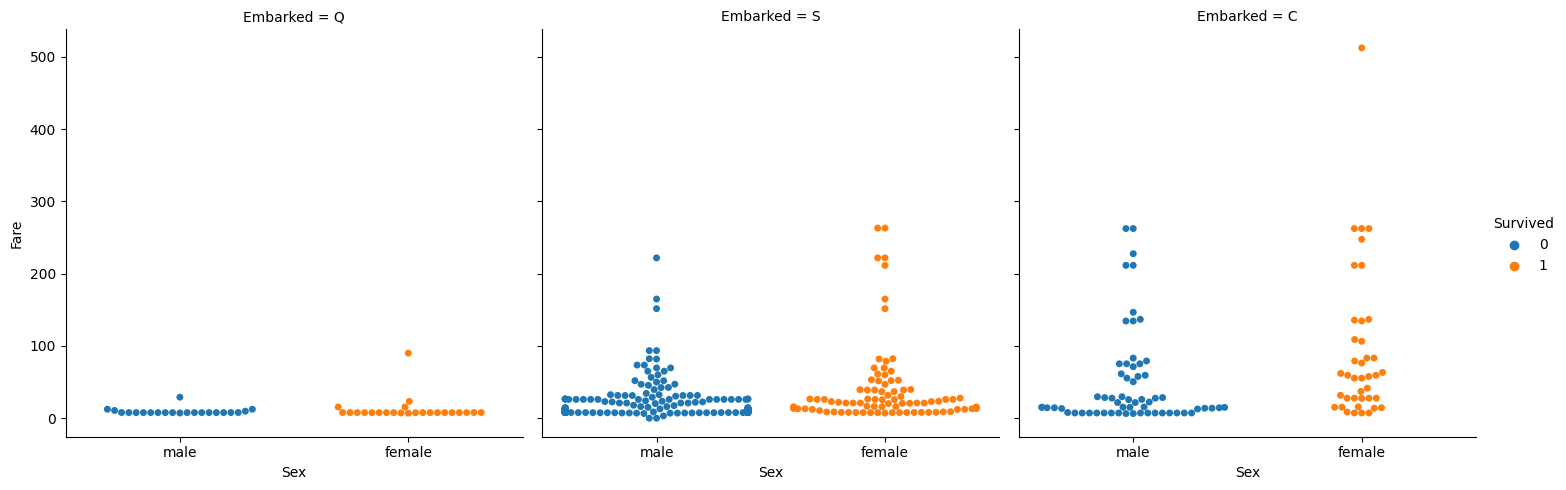

In [ ]:
sns.catplot(data=df, kind="swarm", y="Fare", x="Sex", hue="Survived", col="Embarked")

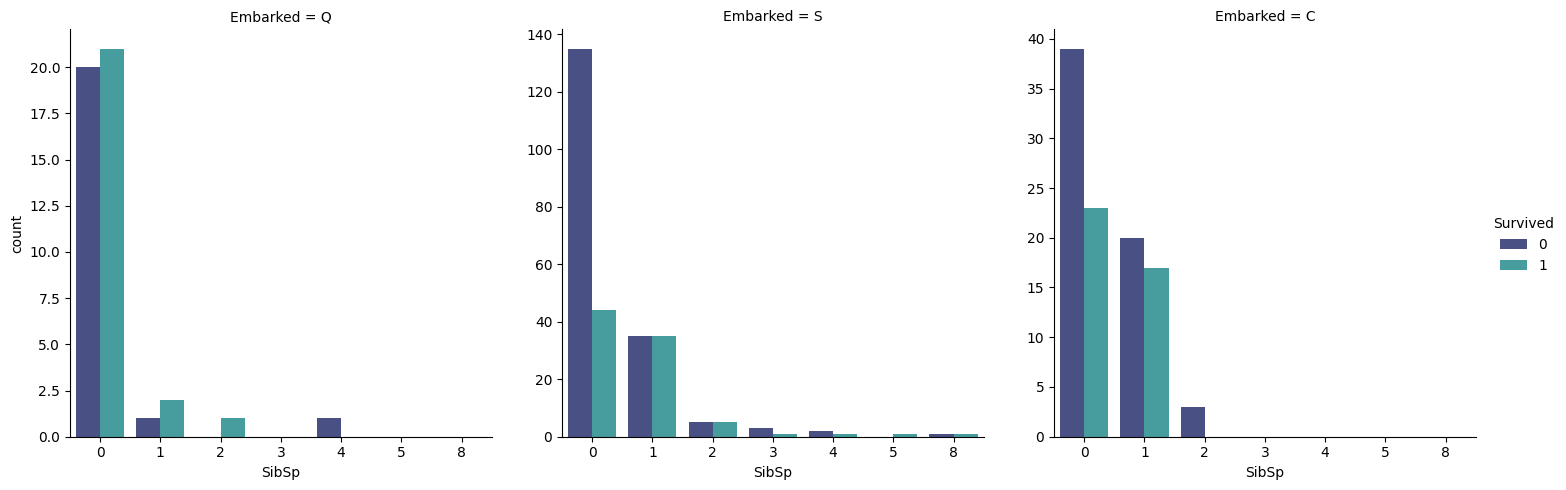

In [ ]:
sns.catplot(data=df, x='SibSp', hue='Survived', col='Embarked', kind='count', sharey=False, palette='mako')

##Machine learning

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

In [ ]:
category_columns=[col for col in df.columns if df[col].dtype=='O']
category_columns

['Name', 'Sex', 'Ticket', 'Embarked']

In [ ]:
encoder=LabelEncoder()

for col in category_columns:
  df[col]=encoder.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,206,1,34.5,0,0,152,7.8292,1
1,893,1,3,402,0,47.0,1,0,221,7.0000,2
2,894,0,2,269,1,62.0,0,0,73,9.6875,1
3,895,0,3,407,1,27.0,0,0,147,8.6625,2
4,896,1,3,178,0,22.0,1,1,138,12.2875,2


<Axes: >

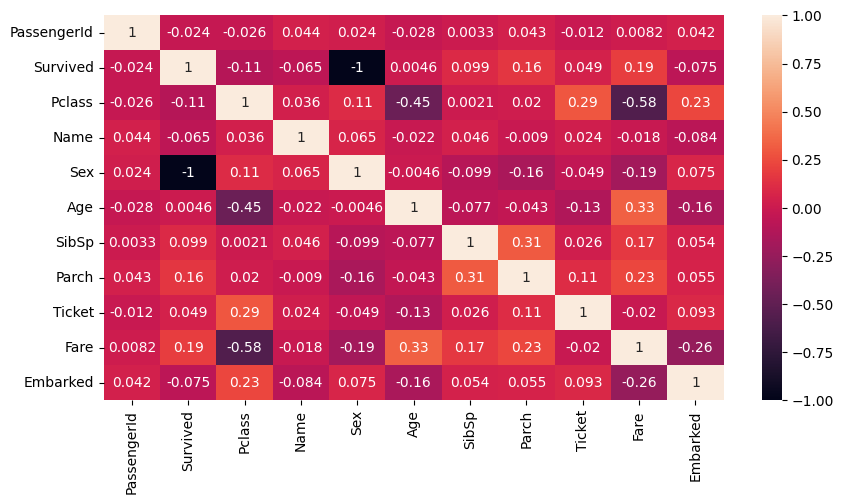

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X=df.drop(['Survived'], axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.3, random_state=13)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
models={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

test_results={}
for name, model in models.items():
  kFold=KFold(n_splits=5, shuffle=True, random_state=13)
  model_result=cross_val_score(model, X_train_scaled, y_train, cv=kFold, scoring='accuracy')
  test_results[name]=model_result
  print(f'{name} accuracy at train set:{model_result.mean()}')


LogisticRegression accuracy at train set:1.0
KNeighborsClassifier accuracy at train set:0.975978959672706
SVC accuracy at train set:0.9827586206896551
DecisionTreeClassifier accuracy at train set:1.0
RandomForestClassifier accuracy at train set:1.0


In [ ]:
y_pred={}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred[name]=model.predict(X_test_scaled)


In [ ]:
accuracy={}
for name, model in models.items():
  accuracy[name]=accuracy_score(y_test, y_pred[name])
  print(f'{name} accuracy at test set: {accuracy[name]}')

LogisticRegression accuracy at test set: 1.0
KNeighborsClassifier accuracy at test set: 0.9841269841269841
SVC accuracy at test set: 0.9920634920634921
DecisionTreeClassifier accuracy at test set: 1.0
RandomForestClassifier accuracy at test set: 1.0


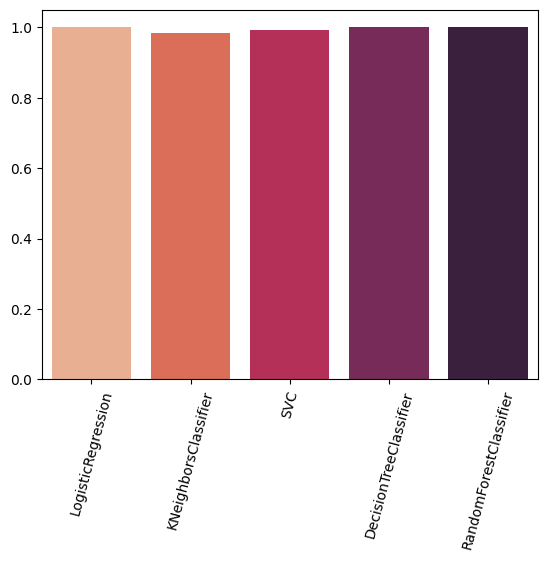

In [ ]:
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='rocket_r')
plt.xticks(rotation=75)
plt.show()